In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-news-articles/historic_articles.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("/kaggle/input/indian-news-articles/historic_articles.csv")

In [4]:
data.head()

,source,category,link,author,published_at,header,subheader,content
0,firstpost,india,https://www.firstpost.com/india/supreme-court-...,FP Staff,"September 21, 2020 20:11:56 IST","Supreme Court, in anti-CAA blockade case, says...",While listening to a batch of petitions agains...,The Supreme Court on Monday said there cannot ...
1,firstpost,india,https://www.firstpost.com/india/rti-reponse-re...,Sumit Chaturvedi,"September 20, 2020 10:02:10 IST",RTI reponse reveals over 18 lakh ration cards ...,The large backlog of pending ration card appli...,Lakhs of migrant workers who returned to their...
2,firstpost,india,https://www.firstpost.com/india/pilot-dies-as-...,Press Trust of India,"September 21, 2020 15:32:17 IST",Pilot dies as four-seater training aircraft cr...,"The aircraft, which belonged to the Indira Gan...",Azamgarh: A four-seater training aircraft cras...
3,firstpost,india,https://www.firstpost.com/india/hcl-technologi...,Press Trust of India,"September 21, 2020 14:15:16 IST",HCL Technologies to acquire Australia’s DWS Lt...,"DWS, with FY20 revenue at AUS $167.9 million, ...",New Delhi: HCL Technologies on Monday said it ...
4,firstpost,india,https://www.firstpost.com/india/parliament-mon...,FP Staff,"September 22, 2020 10:42:06 IST",Parliament LIVE Updates: Pralhad Joshi says go...,Parliament LIVE Updates: Parliamentary Affair ...,Parliament LATEST Updates: Parliamentary Affai...


In [5]:
data['content'][0]

'The Supreme Court on Monday said there cannot be a "universal policy" on right to protest and possible curbs as the situation may vary from case to case.The apex court made the observation while reserving its verdict\xa0on a batch of pleas against the anti-Citizenship Amendment Act (CAA) protests which led to blocking of a road in Shaheen Bagh in the National Capital last December.A bench consisting of justices SK Kaul, Aniruddha Bose, and Krishna Murari stated that the right to protest has to be balanced against other public rights such as the right to mobility.Restrictions had been imposed on the Kalindi Kunj-Shaheen Bagh stretch and the Okhla underpass, which were closed on 15 December due to the protests against the CAA and the National Register of Citizens (NRC).The protest site was however cleared in wake of the COVID-19 pandemic."There were some supervening circumstances which came into play and it was no one\'s hand. God almighty itself intervened," PTI quoted the court as say

In [6]:
article = data['content'][0]

In [7]:
len(article.split())

859

In [8]:
keep = string.ascii_letters + string.digits + " " + "."
article = article.translate(str.maketrans("", "", string.punctuation.replace(".", "")))

In [9]:
# Converting to lowercase
article = article.lower()

In [10]:
# Removing the '\xa0'
article = article.replace("\xa0", " ")

In [11]:
# Removing the HTML
article = re.sub('<.*?>', '', article)

# Removing the email ids
article = re.sub(r'\S+@\S+', '', article)

# Removing The URLS
article = re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', article)


In [12]:
article

'the supreme court on monday said there cannot be a universal policy on right to protest and possible curbs as the situation may vary from case to case.the apex court made the observation while reserving its verdict on a batch of pleas against the anticitizenship amendment act caa protests which led to blocking of a road in shaheen bagh in the national capital last december.a bench consisting of justices sk kaul aniruddha bose and krishna murari stated that the right to protest has to be balanced against other public rights such as the right to mobility.restrictions had been imposed on the kalindi kunjshaheen bagh stretch and the okhla underpass which were closed on 15 december due to the protests against the caa and the national register of citizens nrc.the protest site was however cleared in wake of the covid19 pandemic.there were some supervening circumstances which came into play and it was no ones hand. god almighty itself intervened pti quoted the court as saying.according to bar

In [13]:
#convert article to list of sentences

import nltk
from nltk.tokenize import sent_tokenize

text = sent_tokenize(article)
print(text)

['the supreme court on monday said there cannot be a universal policy on right to protest and possible curbs as the situation may vary from case to case.the apex court made the observation while reserving its verdict on a batch of pleas against the anticitizenship amendment act caa protests which led to blocking of a road in shaheen bagh in the national capital last december.a bench consisting of justices sk kaul aniruddha bose and krishna murari stated that the right to protest has to be balanced against other public rights such as the right to mobility.restrictions had been imposed on the kalindi kunjshaheen bagh stretch and the okhla underpass which were closed on 15 december due to the protests against the caa and the national register of citizens nrc.the protest site was however cleared in wake of the covid19 pandemic.there were some supervening circumstances which came into play and it was no ones hand.', 'god almighty itself intervened pti quoted the court as saying.according to

In [14]:
len(text)

13

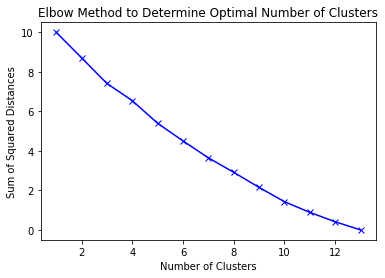

In [15]:
max_clusters = len(text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
    
# Determine the optimal number of clusters using the elbow method
sum_of_squared_distances = []
for num_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [16]:
num_clusters = 7

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Assign each sentence to a cluster
labels = kmeans.labels_

# Create a summary by selecting one sentence from each cluster
summary = []
for i in range(num_clusters):
    cluster_sentences = [text[j] for j in range(len(text)) if labels[j] == i]
    summary.append(cluster_sentences[0])

In [17]:
summary

['state machinery is not sacrosanct.',
 'god almighty itself intervened pti quoted the court as saying.according to barbench solicitor general tushar mehta said suggested that the petitions may not survive in light of the developments in the case however none of the petitioners barring one agreed to withdraw their pleas.one of the petitioners amit sahni said that these kind of protests should not be allowed in larger public interest.this was allowed to have continued for more than 100 days and people faced difficulty.',
 'they have also called bharat bandh on 24 and 25 september he said.advocate mehmood pracha appearing for an intervenor said that there was a right to peaceful protest and some people from a political party went there and created riots.we have the right to protest.',
 'the supreme court on monday said there cannot be a universal policy on right to protest and possible curbs as the situation may vary from case to case.the apex court made the observation while reserving i

In [18]:
len(summary)

7

In [19]:
!pip install rouge

In [20]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [21]:
result = summary

In [22]:
def list_to_string(strings):
    """
    Converts a list of strings into a single string.
    :param strings: List of strings.
    :return: Single string.
    """
    return "".join(strings)

In [23]:
summary_text = list_to_string(result)

In [24]:
def text_to_word_list(text):
    return text.split()

In [25]:
predicted_summary = text_to_word_list(summary_text)

In [26]:
predicted_summary

['state',
 'machinery',
 'is',
 'not',
 'sacrosanct.god',
 'almighty',
 'itself',
 'intervened',
 'pti',
 'quoted',
 'the',
 'court',
 'as',
 'saying.according',
 'to',
 'barbench',
 'solicitor',
 'general',
 'tushar',
 'mehta',
 'said',
 'suggested',
 'that',
 'the',
 'petitions',
 'may',
 'not',
 'survive',
 'in',
 'light',
 'of',
 'the',
 'developments',
 'in',
 'the',
 'case',
 'however',
 'none',
 'of',
 'the',
 'petitioners',
 'barring',
 'one',
 'agreed',
 'to',
 'withdraw',
 'their',
 'pleas.one',
 'of',
 'the',
 'petitioners',
 'amit',
 'sahni',
 'said',
 'that',
 'these',
 'kind',
 'of',
 'protests',
 'should',
 'not',
 'be',
 'allowed',
 'in',
 'larger',
 'public',
 'interest.this',
 'was',
 'allowed',
 'to',
 'have',
 'continued',
 'for',
 'more',
 'than',
 '100',
 'days',
 'and',
 'people',
 'faced',
 'difficulty.they',
 'have',
 'also',
 'called',
 'bharat',
 'bandh',
 'on',
 '24',
 'and',
 '25',
 'september',
 'he',
 'said.advocate',
 'mehmood',
 'pracha',
 'appearing',


In [27]:
def text_to_sentence_list(text):
    import nltk
    nltk.download('punkt')
    from nltk.tokenize import sent_tokenize
    return [sentence.split() for sentence in sent_tokenize(text)]

In [28]:
reference_summary = text_to_sentence_list(article)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
reference_summary

[['the',
  'supreme',
  'court',
  'on',
  'monday',
  'said',
  'there',
  'cannot',
  'be',
  'a',
  'universal',
  'policy',
  'on',
  'right',
  'to',
  'protest',
  'and',
  'possible',
  'curbs',
  'as',
  'the',
  'situation',
  'may',
  'vary',
  'from',
  'case',
  'to',
  'case.the',
  'apex',
  'court',
  'made',
  'the',
  'observation',
  'while',
  'reserving',
  'its',
  'verdict',
  'on',
  'a',
  'batch',
  'of',
  'pleas',
  'against',
  'the',
  'anticitizenship',
  'amendment',
  'act',
  'caa',
  'protests',
  'which',
  'led',
  'to',
  'blocking',
  'of',
  'a',
  'road',
  'in',
  'shaheen',
  'bagh',
  'in',
  'the',
  'national',
  'capital',
  'last',
  'december.a',
  'bench',
  'consisting',
  'of',
  'justices',
  'sk',
  'kaul',
  'aniruddha',
  'bose',
  'and',
  'krishna',
  'murari',
  'stated',
  'that',
  'the',
  'right',
  'to',
  'protest',
  'has',
  'to',
  'be',
  'balanced',
  'against',
  'other',
  'public',
  'rights',
  'such',
  'as',
  '

In [30]:
score = sentence_bleu(reference_summary, predicted_summary)

In [31]:
print("BLEU Score: {:.2f}".format(score))

BLEU Score: 0.92
